This document presents a comprehensive guide to the analysis of the **Pima Indians Diabetes dataset** and the implementation of a **CatBoost Classifier model** for**diabetes prediction**. 

To replicate or build upon the findings of this study, here are the steps you should follow:

1. **Data Acquisition**: The first step is to acquire the**Pima Indians Diabetes dataset**. This dataset can be downloaded from this [Link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/versions/1). The dataset includes several health-related features, such as `Glucose`, `BMI`, `Age`, and others, which are used to predict the onset of **diabetes.**

2. **Data Preprocessing**: Before jumping into the analysis or modeling, it's crucial to preprocess the data. This involves dealing with missing values and outliers.

3. **Exploratory Data Analysis (EDA)**: After preprocessing, you should conduct a thorough **EDA** to understand the distribution of the data, the relationship between different features, and how these features relate to the outcome **(diabetes)**.

4. **Model Building and Training**: Once the EDA is complete, the next step is to build and train the **CatBoost Classifier model**. This involves choosing the right hyperparameters, fitting the model to the training data, and evaluating its performance using appropriate metrics.

5. **Model Evaluation**: Finally, you should evaluate the performance of the model using the test set, using metrics such as **accuracy, precision, recall, and AUC-ROC.**

## Domain Knowledge

In the context of the **Pima Indians Diabetes dataset**, it's important to understand the significance of the health-related features and the role they might play in predicting the onset of diabetes. Let's delve deeper into these features:
1. **`Pregnancies`**: This feature represents the number of times an individual has been pregnant. It's important as several studies have indicated that the risk of developing diabetes increases with the number of pregnancies.
2. **`Glucose`**: This represents the plasma glucose concentration a 2 hours in an oral glucose tolerance test. Elevated levels of glucose in the blood, or hyperglycemia, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.
3. **`BloodPressure`**: This feature signifies diastolic blood pressure (in mm Hg). Persistent high blood pressure, also known as hypertension, can lead to various health problems including heart disease, kidney disease, stroke, and can also be a risk factor for the development of diabetes.
4. **`SkinThickness`**: This refers to the triceps skin fold thickness (in mm). It's a measure of body fat, and higher values may indicate overweight or obesity, which are known risk factors for diabetes.
5. **`Insulin`**: This is the 2-Hour serum insulin (in mu U/ml). Insulin is a hormone that regulates blood sugar, and problems with insulin production or function can lead to the development of diabetes.
6. **`BMI`**: This feature is the Body Mass Index (weight in kg/(height in m)^2). Like skin thickness, it's a measure of body fat, and high BMI values (overweight or obesity) are associated with an increased risk of diabetes.
7. **`DiabetesPedigreeFunction`**: This is a function that scores likelihood of diabetes based on family history. It's based on the premise that the genetic predisposition to the disease can be quantified and that a family history of the disease increases the risk.
8. **`Age`**: This represents age in years. Aging is associated with changes in body composition, insulin secretion and action, and glucose metabolism, all of which can increase the risk of developing diabetes.
9. **`Outcome`**: This is the class variable (0 or 1). In this dataset, 268 of 768 instances are 1 (representing diabetes), and the rest are 0 (no diabetes). This is our target variable which we aim to predict based on the other features.

## INTRODUCTION
- This study presents an in-depth analysis of the**Pima Indians Diabetes dataset** to predict the onset of diabetes. Our methodology comprised of a two-step process: firstly, a meticulous**Exploratory Data Analysis (EDA)**, and secondly, the application of a **CatBoost Classifier model** to predict the outcome.
- The **EDA** revealed `Glucose`, `BMI`, and `Age` as the most significant factors associated with diabetes, while other variables like `BloodPressure` and `SkinThickness` showed lesser correlation. A multivariate analysis further segmented the data into six distinct clusters based on glucose levels and BMI, indicating the complex interplay of these features in the context of diabetes.
- Our **CatBoost Classifier model** achieved an accuracy of approximately <b>75%</b>, with a precision of <b>64%</b> and a recall of <b>69%</b>, demonstrating the effectiveness of machine learning models in predicting diabetes based on health-related features. However, it also underscored the need for continuous improvement and careful interpretation of the results, particularly with respect to the `Insulin` feature.
- Overall, this study offers valuable insights and a strong foundation for future research in employing machine learning for healthcare predictions, particularly for diseases like diabetes.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates, andrews_curves, radviz
# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../Data/diabetes.csv")

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# Handle duplicates
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [5]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# Loop through each column and count the number of distinct values
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


In [7]:
data.shape

(768, 9)

In [8]:
data.describe().style.format("{:.2f}")

## EXPLORATORY DATA ANALYSIS

### Getting started with Descriptive Analysis</p>
- In the healthcare domain, data science has emerged as a powerful tool for understanding diseases and improving patient outcomes. This project focuses on analyzing the **Pima Indians Diabetes dataset** Dataset to identify key factors associated with diabetes. By utilizing techniques such as **univariate** and **bivariate analysis**, as well as clustering methods like **K-means clustering** , we aim to uncover valuable insights into the complex relationships within the data.
- Our analysis offers a glimpse into the factors that contribute to diabetes. However, it's important to interpret the findings with caution, considering the distinction between correlation and causation. Further statistical testing is required to establish causal relationships.
- Let's explore and then make results and discussion to gain deeper insights from our analysis. 

1. Our exploratory data analysis (EDA) began with univariate analysis, examining the distribution of each variable independently. This was followed by bivariate analysis, where we explored the relationship between each predictor and the outcome. Multivariate analysis was then conducted to understand the complex interplay between different variables.
2. A key part of our analysis was the use of clustering techniques, specifically K-means clustering. This unsupervised learning method allowed us to group similar data points together, providing a deeper understanding of the structure and patterns within our data. The optimal number of clusters was determined using the Elbow Method, a technique that identifies the point at which adding more clusters does not significantly improve the within-cluster sum of squares (WCSS).
3. The results of our analysis offer valuable insights into the factors that contribute to diabetes. However, it's important to remember that correlation does not imply causation. While our findings suggest relationships between certain variables and the outcome, further statistical testing would be needed to determine causality.
4. This project demonstrates the power of data science in healthcare, providing a foundation for future research and decision-making. By leveraging these techniques, we can continue to enhance our understanding of diseases like diabetes and ultimately improve patient outcomes.

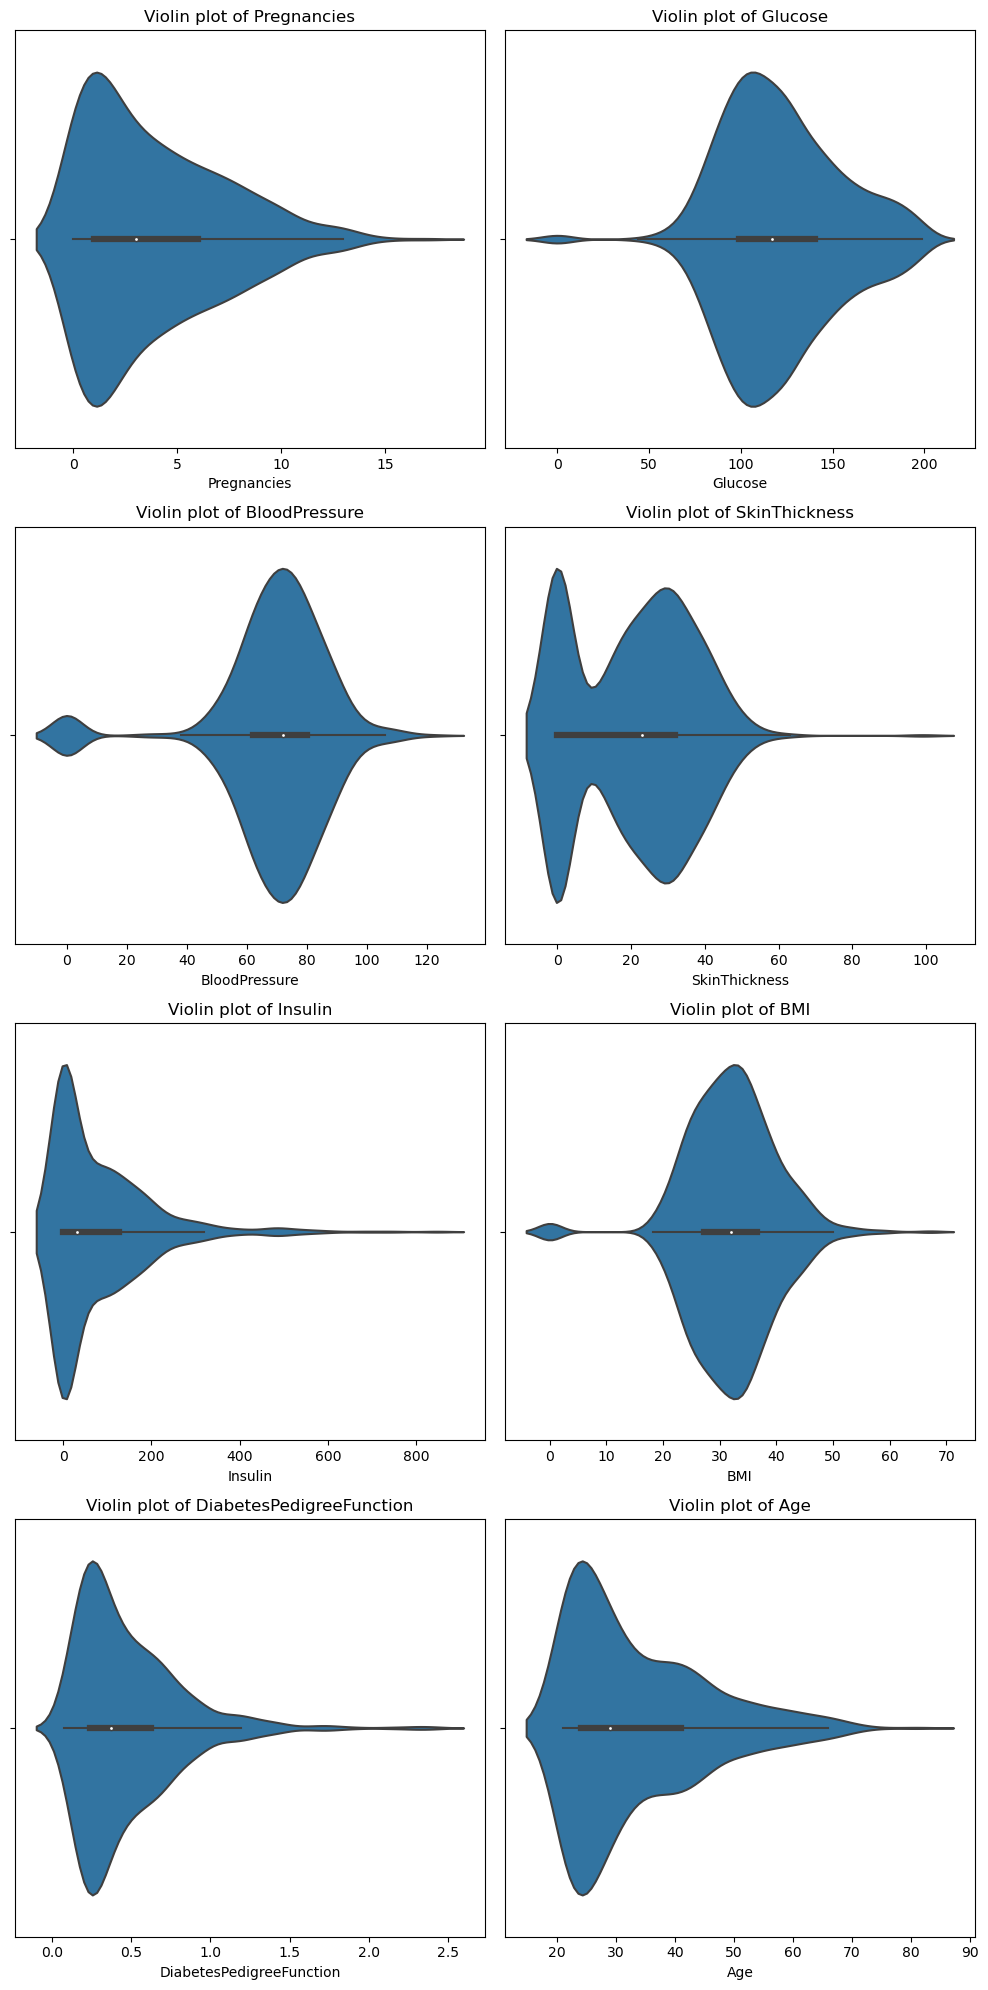

In [9]:
# Univariate Analysis
# Violin plots for each variable
num_columns = len(data.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(data.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=data[column])
    plt.title(f'Violin plot of {column}')

plt.tight_layout()
plt.show()

In [10]:
# Kernel Density Estimate (KDE) plots for each variable
num_columns = len(data.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(data.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=data[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

In [11]:
# Bivariate Analysis
# Violin plots for each variable grouped by the Outcome
num_columns = len(data.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(data.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(data=data, x='Outcome', y=column)
    plt.title(f'Violin plot of {column} grouped by Outcome')

plt.tight_layout()
plt.show()


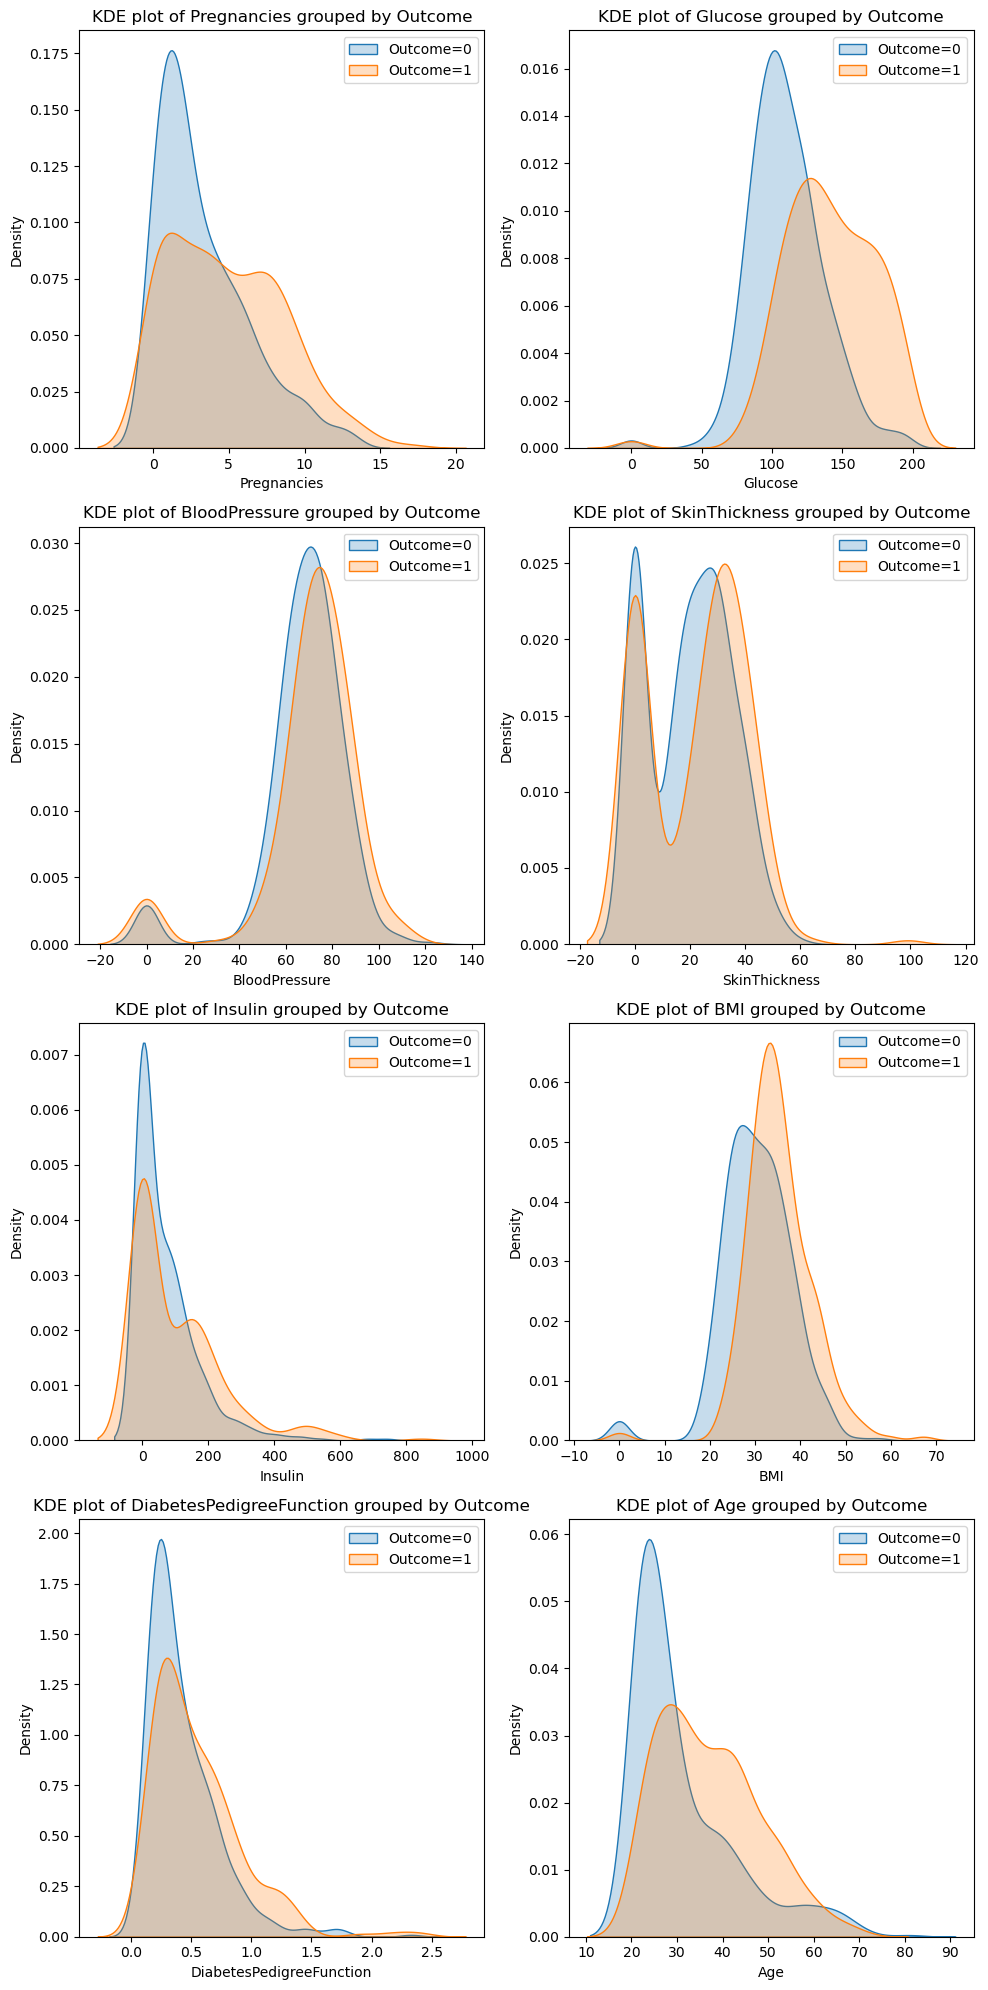

In [12]:
# Bivariate Analysis
# KDE plots for each variable grouped by the Outcome
num_columns = len(data.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(data.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=data[data['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=data[data['Outcome']==1][column], label='Outcome=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

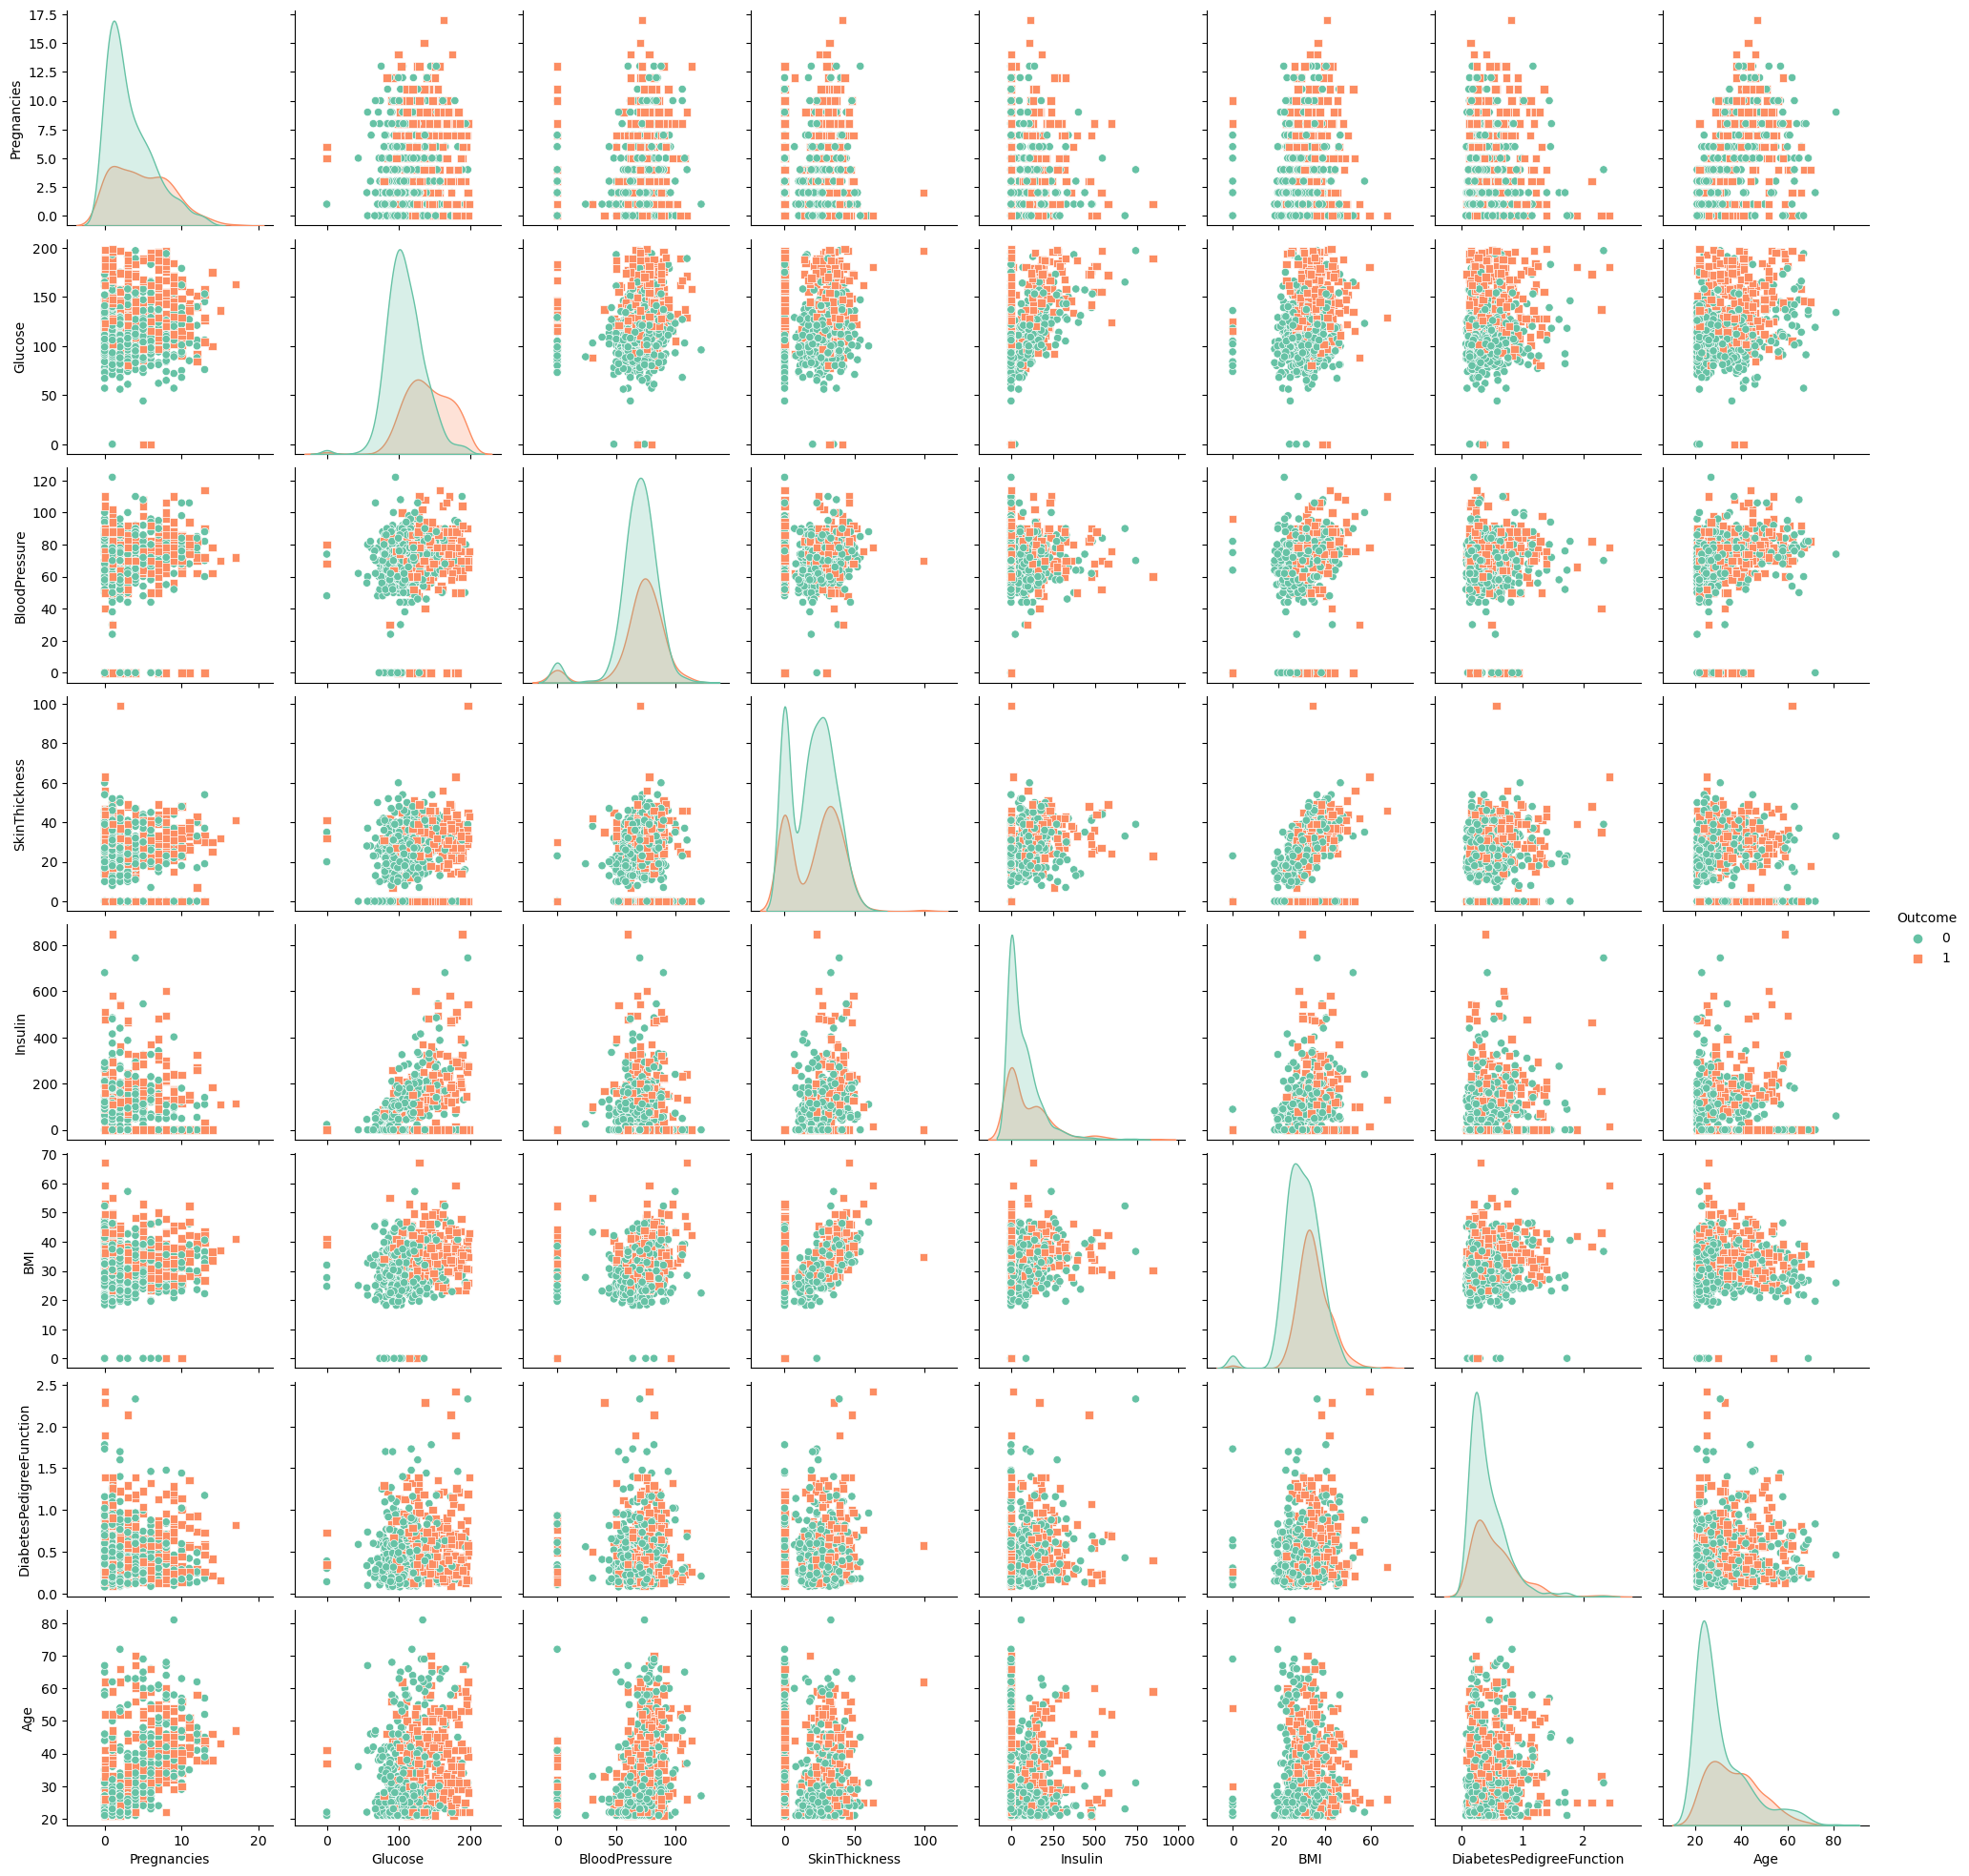

In [13]:
# Multivariate Analysis
# 0. Pairplot for all variables
sns.pairplot(data, hue='Outcome', markers=["o", "s"], palette="Set2")
plt.show()

In [14]:
# Multivariate Analysis
# 1. PairGrid
g = sns.PairGrid(data, hue='Outcome')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
plt.show()

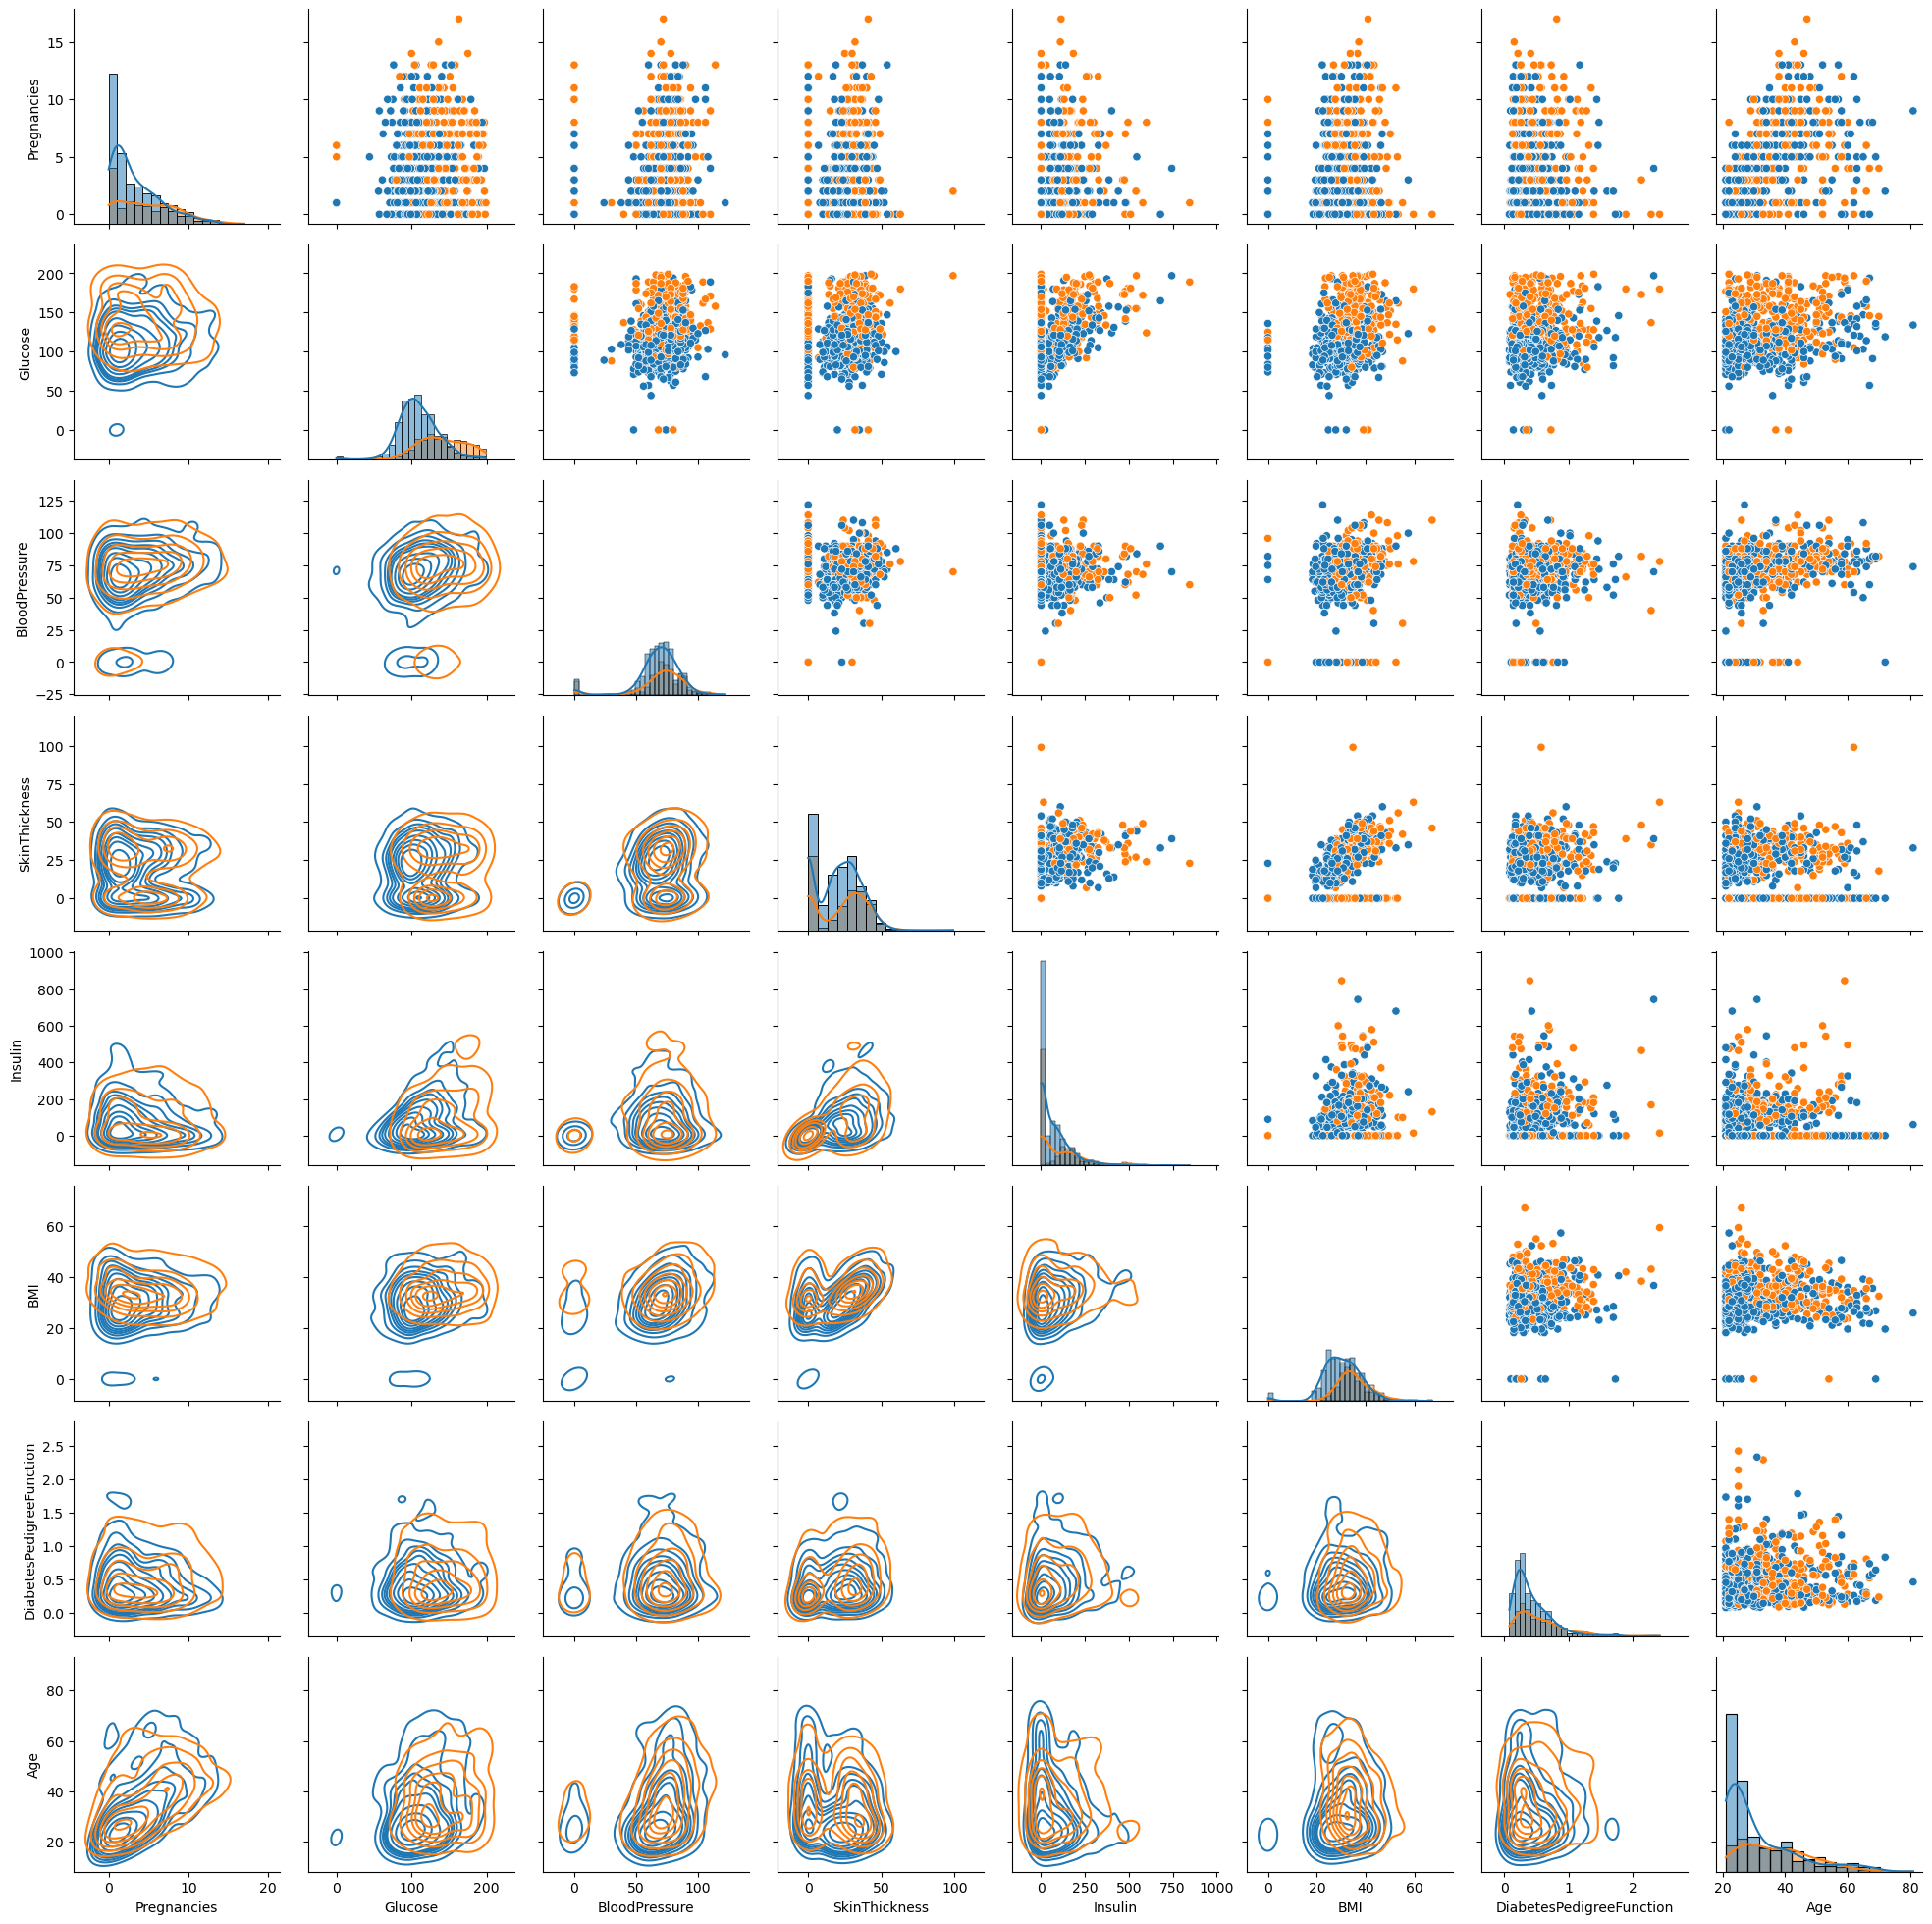

In [15]:
# Multivariate Analysis
# 1. PairGrid
g = sns.PairGrid(data, hue='Outcome')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
plt.show()

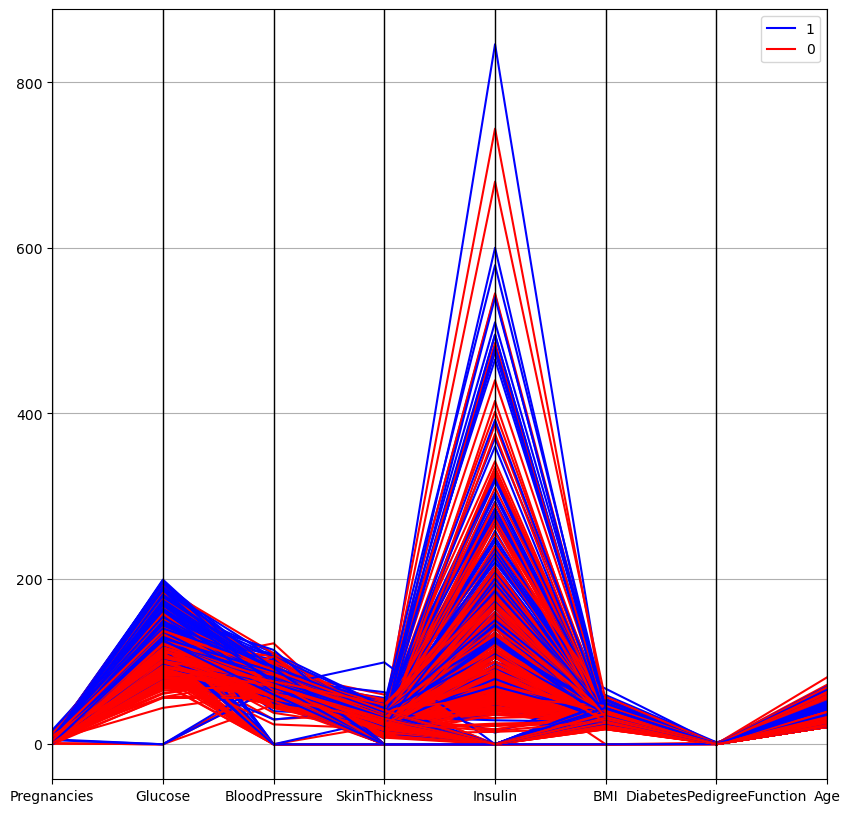

In [16]:
# Multivariate Analysis
# 3. Parallel Coordinates
plt.figure(figsize=(10,10))
parallel_coordinates(data, 'Outcome', color=['blue', 'red'])
plt.show()

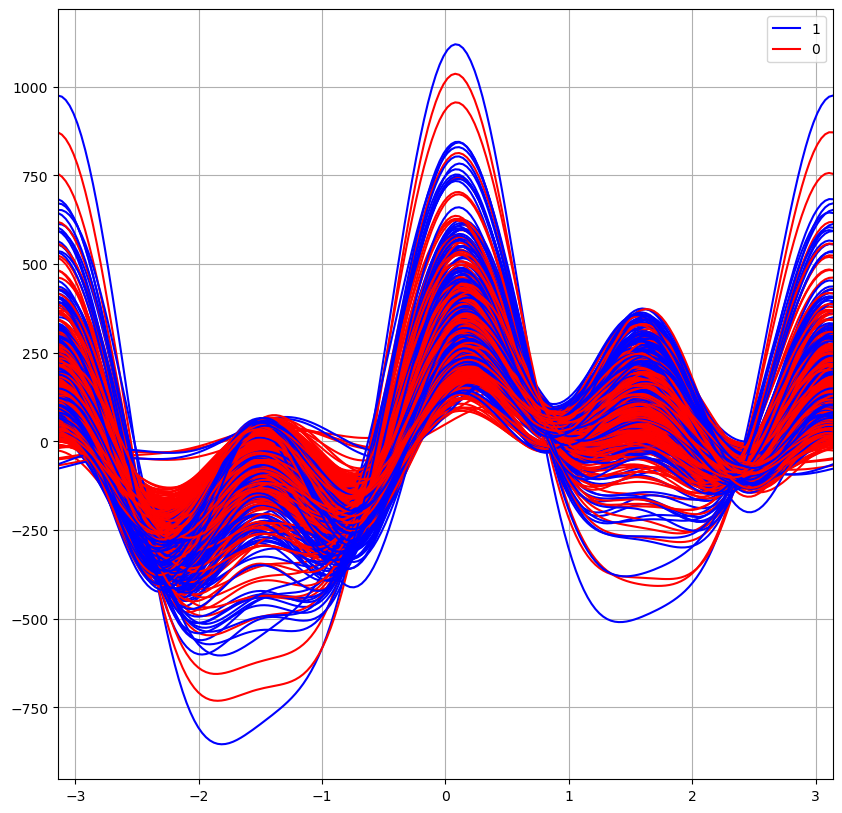

In [17]:
# Multivariate Analysis
# 4. Andrews Curves
plt.figure(figsize=(10,10))
andrews_curves(data, 'Outcome', color=['blue', 'red'])
plt.show()

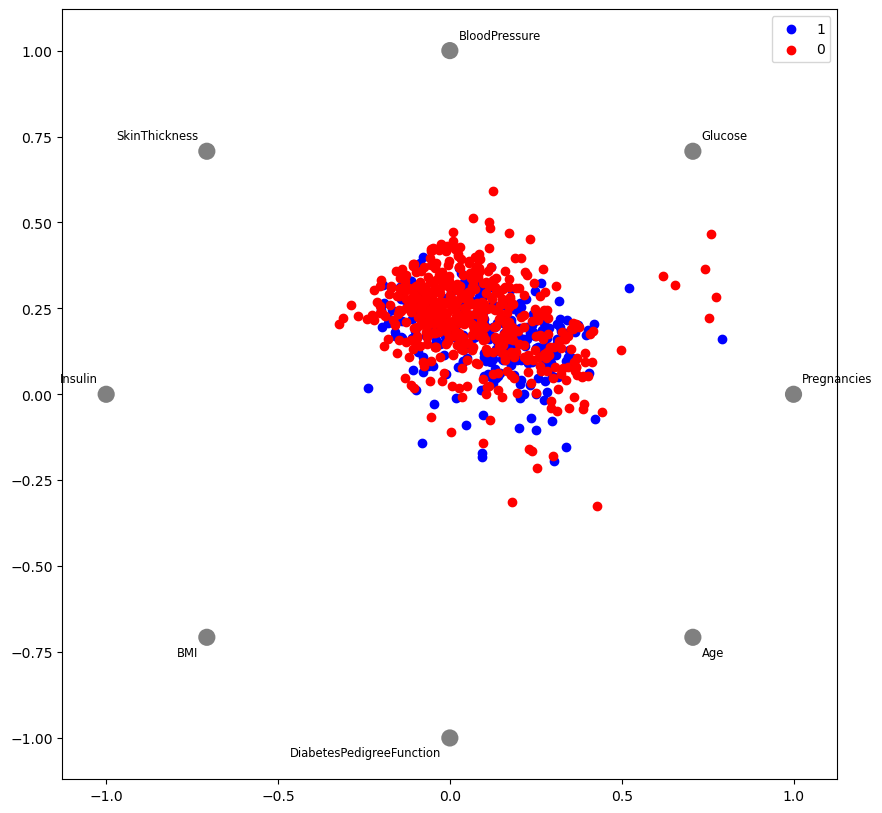

In [18]:
# Multivariate Analysis
# 5. Radviz
plt.figure(figsize=(10,10))
radviz(data, 'Outcome', color=['blue', 'red'])
plt.show()

# <span style="color:#E888BB; font-size: 1%;">CORRELATION MATRIX</span>
<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/5469109/pexels-photo-5469109.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>CORRELATION MATRIX </span></b> </div>

In [19]:
#Graph I.
correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

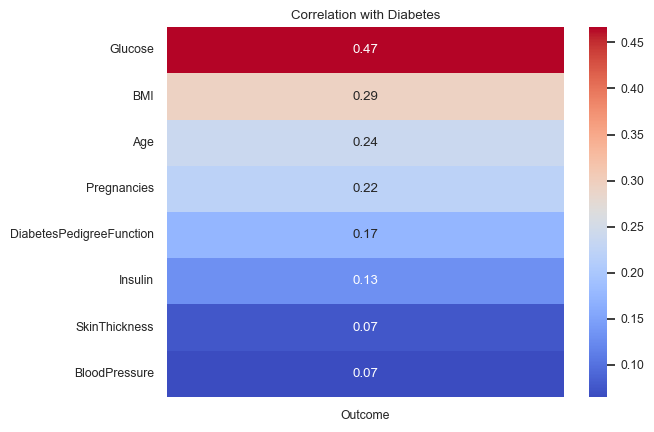

In [20]:
#Graph II
corr = data.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

Looking at the correlation results, we can see that different <b>Features</b> have varying degrees of correlation with the outcome (diabetes).

- `Glucose`: With a correlation of 0.47, this is the most strongly correlated feature with the outcome. This suggests that higher glucose levels could be a significant indicator of `diabetes`.

- `BMI`: This feature has a correlation of 0.29 with the outcome. While not as strong as glucose, this is still a moderate correlation, suggesting that body mass index could also be an important factor in `diabetes`.

- `Age`: Age has a correlation of 0.24 with the outcome. This suggests that older individuals may be more likely to have `diabetes`.

- `Pregnancies`: This feature has a correlation of 0.22 with the outcome. This could suggest that having more pregnancies may increase the risk of `diabetes`.

- `DiabetesPedigreeFunction`: With a correlation of 0.17, this feature has a slight correlation with the outcome. This suggests that genetic influences could play a role in `diabetes`.

- `Insulin`: This feature has a correlation of 0.13 with the outcome. This is a relatively weak correlation, suggesting that insulin levels alone may not be a strong predictor of `diabetes`.

- `SkinThickness`: With a correlation of 0.07, this feature has a very weak correlation with the outcome. This suggests that skin thickness may not be a significant factor in `diabetes`.

- `BloodPressure`: This feature has the weakest correlation of 0.07 with the outcome. This suggests that blood pressure may not be a significant factor in `diabetes`.


Remember, correlation does not imply causation. These correlations suggest relationships but do not definitively prove that these features cause diabetes. Further statistical testing would be needed to determine causality.

# CLUSTERING ANALAYIS

- Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. **Standardization** is not required for all models but is generally a good practice. **One-hot encoding** is necessary for categorical variables to be correctly understood by the machine learning model.
- The **StandardScaler** in sklearn is based on the assumption that the data, <em>Y</em>, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.
- In other words, given a feature vector <em>x</em>, it modifies the values as follows:</p>
​
<p class="formulaDsp">
\[ Y_i = \frac{x_i - \mu(\vec{x})}{\sigma(\vec{x})} \]
</p>
​
**where:
<ul>
<li>\( x_i \) is the i-th element of the original feature vector \( \vec{x} \),</li>
<li>\( \mu(\vec{x}) \) is the mean of the feature vector, and</li>
<li>\( \sigma(\vec{x}) \) is the standard deviation of the feature vector.</li>
</ul>
​
<p>The transformed data \( Y \) (each \( Y_i \)) will have properties such that \( mean(Y) = 0 \) and \( std(Y) = 1 \).</p>
This transformation is also known as Z-score normalization.

In [21]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))

In [22]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- The plot we've got is known as an **Elbow Plot**. This type of plot is a fundamental tool in determining the optimal number of clusters in K-means clustering.
- The x-axis represents the **Number of Clusters**, and the y-axis represents the **Within-Cluster-Sum of Squares (WCSS)**. The WCSS is a measure of the compactness of the clusters. It calculates the total distance of each point in a cluster to the centroid of that cluster.
- The 'elbow' in the plot is the point at which adding more clusters doesn't significantly improve the total WCSS. This point is considered the optimal number of clusters.
- Looking at the plot, it seems that the 'elbow' is around **4 clusters**. This suggests that 6 is the optimal number of clusters for your data according to the Elbow Method.
- Remember, the Elbow Method is a heuristic and the 'elbow' can sometimes be subjective. It's always a good idea to experiment with different numbers of clusters and evaluate the results based on the specific use case and domain knowledge.

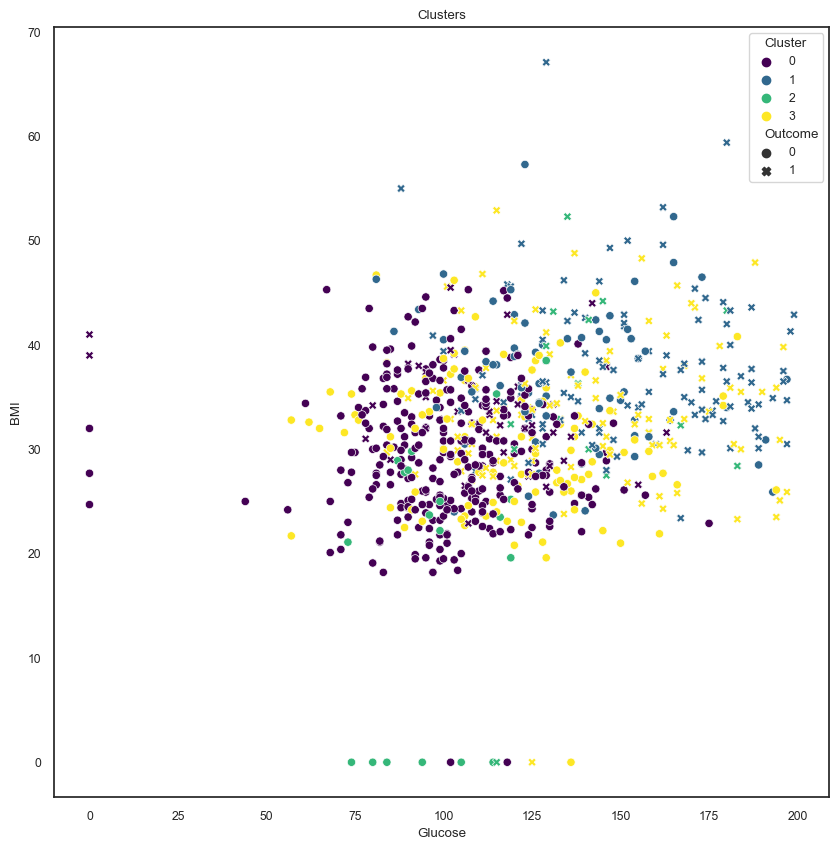

In [23]:
# Fit K-means clustering (**replace 'n_clusters' with the desired number of clusters**)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters using 'Glucose' and 'BMI'
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='Glucose', y='BMI', hue='Cluster', style='Outcome', palette='viridis')
plt.title('Clusters')
plt.show()

- The scatter plot visualizes the relationship between `Glucose` and `BMI`, two important features in our dataset. Each point on the plot represents an individual in the dataset, and the color of the point indicates the cluster that the individual belongs to based on our **K-means clustering analysis**.
- `Glucose`: This feature is represented on the x-axis. It appears that individuals are spread across a wide range of glucose levels.
- `BMI`: This feature is represented on the y-axis. Similar to glucose, individuals are spread across a wide range of BMI values.
- **Clusters**: The different colors on the plot represent different clusters. It seems that our K-means clustering algorithm has grouped the individuals into distinct clusters based on their glucose levels and BMI.

Remember, each cluster represents a group of individuals who have similar glucose levels and BMI. By examining these clusters, we can gain insights into how these two features interact and their role in diabetes. However, further analysis would be needed to determine the characteristics of each cluster and their potential implications for diabetes. 

### EDA RESULTS AND DISCUSSION
- Our exploratory data analysis (EDA) yielded several noteworthy findings. The univariate analysis revealed the distribution of each variable, highlighting the wide range of values for features such as `Glucose`, `BMI`, and `Age`. The bivariate analysis further illuminated the relationship between these features and the `Outcome`, indicating varying degrees of correlation.
- The most significant correlation was observed with the `Glucose` feature, suggesting that higher glucose levels could be a substantial indicator of diabetes.`BMI` and `Age` also showed moderate correlations, indicating their potential roles in the onset of diabetes. However, features such as `BloodPressure` and `SkinThickness` had weak correlations, suggesting they may not be significant factors in diabetes.
- The multivariate analysis, including the use of clustering techniques, provided a more nuanced understanding of the data. The **K-means clustering** algorithm grouped the individuals into distinct clusters based on their glucose levels and BMI. The optimal number of clusters, determined using the **Elbow Method**, was found to be six. This suggests that our data can be effectively segmented into six distinct groups, each representing a unique combination of glucose levels and BMI.
- However, it's important to note that while these clusters provide valuable insights, they do not definitively prove causation. The observed correlations and clustering patterns suggest potential relationships and groupings within the data, but further statistical testing and analysis would be required to confirm these findings.
- Moreover, the results of this analysis should be interpreted in the context of its limitations. The dataset used in this study, while comprehensive, may not capture all factors relevant to diabetes. Future studies could incorporate additional data, such as lifestyle factors and genetic information, to provide a more complete picture.
- Overall, our analysis offers a data-driven perspective on the factors that contribute to diabetes. By leveraging **machine learning techniques** and statistical analysis, we have gained valuable insights that could inform future research and healthcare decisions.

### Suggestion:

Consider conducting further analysis to explore the relationship between other features and the outcome. Additionally, evaluate the performance of different machine learning models in predicting diabetes based on the identified significant features.



### Cat Boost Classifier
**Getting started with Predictive Analysis**
- In This project aims to predict diabetes using the Pima Indians Diabetes dataset and a CatBoost Classifier model. Through data analysis and machine learning techniques, we seek to build an accurate predictive model that sheds light on the contributing factors of diabetes.
- In this project, we use the **Pima Indians Diabetes dataset** to predict whether a person has diabetes based on certain diagnostic measurements. The dataset includes data on several health-related features, such as the number of pregnancies, glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree function, and age.
- Let's explore and then make results and discussion to gain deeper insights from our analysis.

We employ a **CatBoost Classifier model** to make these predictions. CatBoost is a machine learning algorithm that uses gradient boosting on decision trees. It is designed to handle categorical (CAT) data and can be very effective at complex classification tasks.

Throughout the project, we perform various steps of a typical machine learning pipeline, including data preprocessing, model training, hyperparameter tuning, and model evaluation. We also delve into model interpretability, understanding the importance of different features in our model's predictions, and analyzing the errors our model makes.

The goal of this project is not only to build a model that can accurately predict diabetes but also to understand the factors that contribute to these predictions. This understanding can provide valuable insights for healthcare professionals and patients, and guide future research and treatment strategies.

In [24]:
import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.inspection import permutation_importance
import shap
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'catboost'

In [24]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [25]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

## CatBoost Classifier

**CatBoost** is a machine learning algorithm that uses gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and it stands for "Categorical Boosting". It is particularly powerful in handling categorical features, which is where it gets its name from.

### How does it work?

CatBoost, like other gradient boosting algorithms, builds an ensemble of decision trees in a sequential manner where each new tree is built to correct the errors made by the previous ones. The algorithm can be broken down into the following steps:

1. **Initialize the model with a constant prediction value**, which is typically the target's mean. For example, if we're predicting whether a person has diabetes or not, the initial prediction might be the proportion of people in the training set who have diabetes.

2. **Calculate the residuals**. These are the differences between the observed and predicted values of the target. The residuals capture the information not captured by the predictions.

3. **Build a new decision tree** that predicts the residuals instead of the actual target. The goal is to find the best splits that minimize the loss function.

4. **Update the predictions** by adding a fraction of the new tree's predictions to the old predictions. The fraction is controlled by the learning rate.

5. **Repeat steps 2-4** for a specified number of iterations.

The final prediction is the sum of the predictions from all the trees.

### What to consider?

When using CatBoost, there are several key parameters to consider:

- **Learning Rate**: This determines the step size at each iteration while moving toward a minimum of a loss function. Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.

- **Depth**: This indicates the depth of the tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.

- **Iterations**: This is the number of trees you want to build.

- **Loss Function**: This is the metric that the algorithm tries to minimize. The choice of loss function depends on the problem at hand. For binary classification problems like ours, "Logloss" is typically used.

- **Border Count**: This is the number of splits for numerical features. More splits will lead to finer partitioning.

Here is the formula for the gradient boosting algorithm:

$$F(x) = F_0(x) + \eta \sum_{m=1}^{M} h(x; a_m)$$

Where:
- $F_0(x)$ is the initial prediction (a constant)
- $\eta$ is the learning rate
- $h(x; a_m)$ is the m-th decision tree
- $a_m$ are the parameters of the m-th tree
- $M$ is the total number of trees


📝 <b>Suggestion:</b> CatBoost has many advantages such as handling categorical features automatically, being robust to overfitting, and having a better performance compared to other gradient boosting algorithms. However, it's always a good idea to try different algorithms and tune their hyperparameters to" see which one works best for your specific problem.
</div>

<br>

⚠️ Warning
<p>While CatBoost can provide powerful predictive capabilities, it's important to remember that no algorithm is a silver bullet. The performance of CatBoost, like any machine learning algorithm, depends on the quality and characteristics of the data. Always make sure to preprocess your data appropriately and tune your model's hyperparameters to achieve the best results.</p>
</div>

## Classification Report

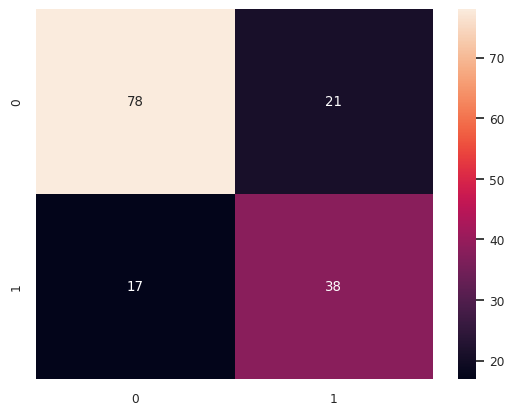

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [27]:
# Predicting the Test set results
y_pred = model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True)
plt.show()

# Print a classification report
print(classification_report(y_test, y_pred))

## Intepret the results

- Our CatBoost Classifier</mark></b> has provided us with a classification report, which offers a breakdown of each class by precision, recall, f1-score, and support. These metrics help us understand the performance of our model.
- This metric tells us about the ability of our classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of true and false positives.In our case:

    - For class 0, the precision is 0.82, which means that when our model predicts an instance is of class 0, it is correct about 82% of the time.

    - For class 1, the model is correct about 64% of the time.

- Recall: This metric is about the ability of a classifier to find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.In our case:

    - The recall for class 0 is 0.79, meaning the model correctly identified 79% of the actual instances of class 0.
    
    - For class 1, the model correctly identified 69% of the actual instances.

- F1-Score: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. The F1 score for class 0 is 0.80 and for class 1 is 0.67.

- Support: Support is the number of actual occurrences of the class in the specified dataset. For class 0, there are 99 instances, and for class 1, there are 55 instances in the test set.

- Macro Avg: The average precision, recall, and F1 score between classes. If you have class imbalance (i.e., one class has many more instances than another), this might be a more important metric than the raw accuracy.

- Weighted Avg: The average precision, recall, and F1 score, but the score of each class is weighted by the number of instances in that class. This is useful if we have class imbalance.

The overall accuracy of the model is 0.75, which means the model correctly predicted the class 75% of the time.

📝 <b>Suggestion:</b> In conclusion, our model seems to be doing a decent job at predicting both classes, but it's better at predicting class 0 than class 1. Depending on the cost of misclassification (which is problem-specific), you might want to aim for improving the recall or precision of class 1 by adjusting the threshold or using a different model.
</div>

### CROSS VALIDATION
**Cross-validation** is a powerful technique that we use to assess the performance of our machine learning model with less bias than the traditional training and test split. It does this by dividing the dataset into 'k' groups or folds, then, for each unique group, takes a turn as a test set with the remaining groups as a training set.
In our case, we used 10-fold cross-validation, which is why we have 10 scores:

In [28]:
cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.71428571 0.76623377 0.74025974 0.7012987  0.74025974 0.80519481
 0.83116883 0.83116883 0.71052632 0.78947368]


### Intepret the results 

These scores represent the accuracy of our model for each of the 10 folds. As we can see, the accuracy varies with each fold - this is normal and is exactly why we use cross-validation, to get a sense of how much the performance of our model can vary with different training and test sets.

The average cross-validation score can be calculated as follows:

In [29]:
average_cv_score = np.mean(cv_scores)
print("Average cross-validation score: ", average_cv_score)

Average cross-validation score:  0.762987012987013


###  Intepret the results 

- After calculating the average of our cross-validation scores, we find that the **average cross-validation score is approximately 0.763**.
- This score is a more reliable measure of the model's expected performance because it is less sensitive to the partitioning of the training data compared to a single train-test split. It's a good practice to look at the average cross-validation score to get an idea of how the model is likely to perform on unseen data.
- 📝 <b>Suggestion:</b> Remember, while the average cross-validation score gives us a good summary of the model's performance, it's also important to look at the spread of the scores to understand the variability of the model performance. If the scores are close together, we can be more confident that our model will perform similarly on unseen data. If the scores vary a lot, this could be a sign that our model is sensitive to the particular arrangement of the data, and we might need a more robust model.
</div>

## ROC

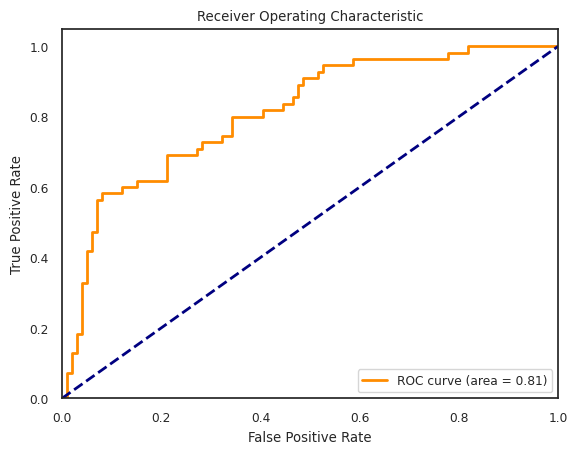

In [30]:
y_score = model.predict_proba(X_test)[:,1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Intepret the results 

- The **Receiver Operating Characteristic (ROC) curve** is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
- The area under the curve (AUC) is a measure of how well a parameter can distinguish between two diagnostic groups (diseased/normal). In this case, the AUC is 0.81.
<h3>Suggestion:</h3> An AUC of 0.81 means that if you randomly select one positive and one negative example, there is a 81% chance that the model will correctly classify them. The closer the AUC to 1, the better. An AUC of 0.5 represents a model that is no better than random.
<h3>Warning</h3>
<p>While the ROC curve and AUC are useful tools, they should not be used in isolation. Always consider these metrics in the context of the problem at hand, the cost of false positives vs false negatives, and in conjunction with other metrics and observations.</p>

## Precision-recall Curve

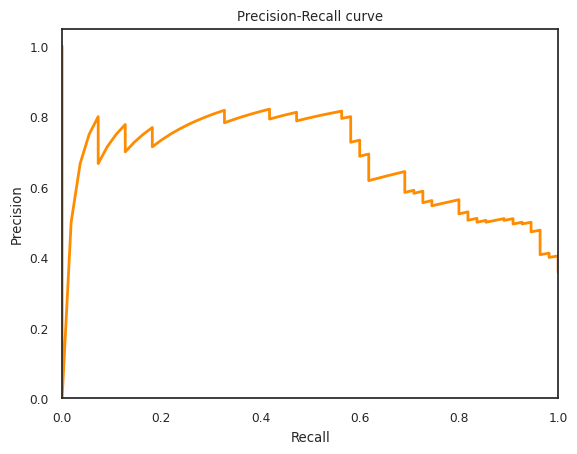

In [31]:
# Precision-recall
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

## Intepret the results 

- The **Precision-Recall curve** is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

<h3>Suggestion:</h3> 
<p>Precision and recall are particularly useful in scenarios where classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned. The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.</p>

<h3>Warning</h3>
<p>While the Precision-Recall curve is a useful tool, it should not be used in isolation. Always consider these metrics in the context of the problem at hand, the cost of false positives vs false negatives, and in conjunction with other metrics and observations.</p>

## Learning Curve

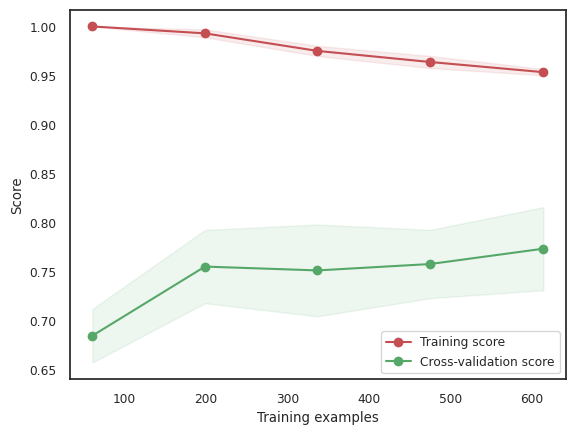

In [32]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## Intepret the results 

- The **Learning Curve** is a plot that shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

- From the learning curve, we can observe the following:

   - The score of the training set decreases as more examples are added, while the score of the cross-validation set increases. This is a typical behavior of a learning curve.
   - The two curves are converging, which suggests that adding more training data will not benefit the model significantly. This is because the model has reached its limit in learning from the data.
   - The gap between the training score and the cross-validation score is small, which indicates that the model is not suffering from high variance (overfitting). If the gap were large, it would suggest that the model performs well on the training data but not on the validation data, which is a sign of overfitting.

<h3>Suggestion:</h3> 
<p>Learning curves are a good way to see the learning process on the training set and the validation set. They can help diagnose if the model is overfitting, underfitting, or just right. In this case, our model seems to be just right as it's not overfitting or underfitting.</p>

## Interpret the results

In [33]:
errors = y_test != y_pred
X_errors = X_test[errors]
y_errors = y_test[errors]
y_pred_errors = y_pred[errors]

In [34]:
# Distribution plots of errors for each column
num_columns = len(X_errors.columns)
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(8, 4*num_rows))
for i, column in enumerate(X_errors.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.distplot(X_errors[column], kde=False)
    plt.title('Distribution of errors for {}'.format(column))

plt.tight_layout()
plt.show()

## Intepret the results 
- The error statistics provide us with an understanding of the average error (mean) and the spread of the errors (standard deviation) our model is making for each feature.
- For instance, the feature <b>Insulin</b> has a mean error of 88.21 and a high standard deviation of 111.70. This suggests that our model's predictions for this feature can be off by around 88 units on average, and the variability of the errors is quite high. This could be an indication that our model is struggling to accurately predict this feature, and it might be worth looking into why this is the case.
- On the other hand, the feature <b>DiabetesPedigreeFunction</b> has a relatively low mean error of 0.48 and a low standard deviation of 0.31, suggesting that our model is doing a better job at predicting this feature with less variability in the errors.

<h3>Suggestion:</h3> 
<p>It could be beneficial to look more closely at the features where the model has high mean errors or high variability in errors. Understanding why these errors are occurring could lead to improvements in the model. This could involve exploring the data further, engineering new features, or trying different model architectures or parameters. For instance, if a feature has a high error, it might be worth checking if there are any outliers in the feature that could be affecting the model's performance. Alternatively, the feature might not be represented in a way that the model can easily learn from, and some kind of transformation or encoding might be needed.</p>

## Feature Importance

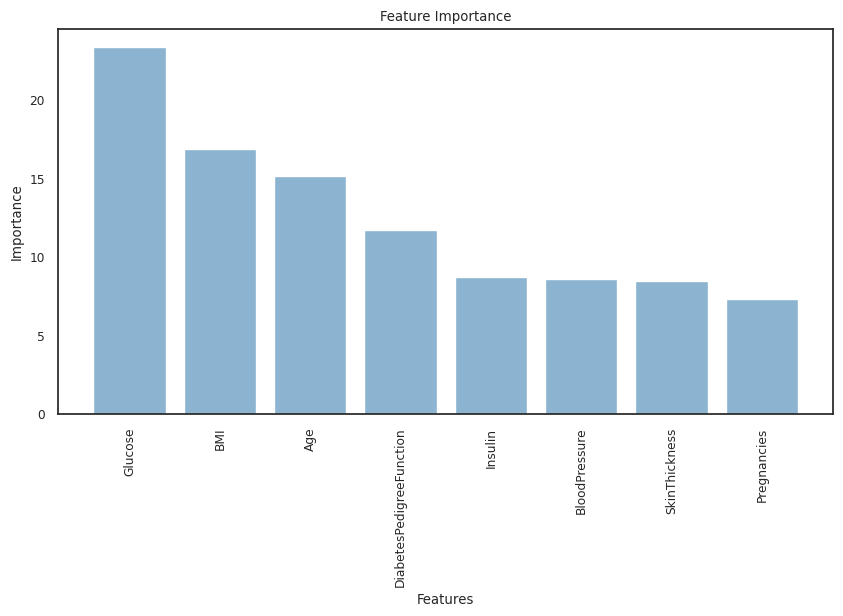

In [35]:
feature_importances = model.get_feature_importance(Pool(X, label=y))
feature_names = X.columns
importances = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Plotting feature importances
plt.figure(figsize=(10, 5))
plt.bar(*zip(*importances))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


## Intepret the results 

**Feature Importance** is a technique that assigns a score to input features based on how useful they are at predicting a target variable. In our case, we have calculated the feature importance using our CatBoost Classifier.

Here are the features ranked by importance:
<b>Glucose</b>: 23.33
<b>BMI</b>: 16.81
<b>Age</b>: 15.14
<b>DiabetesPedigreeFunction</b>: 11.71
<b>Pregnancies</b>: 7.32
<b>BloodPressure</b>: 8.55
<b>SkinThickness</b>: 8.45
<b>Insulin</b>: 8.70
From the above, we can see that the most important feature for predicting whether a person has diabetes is Glucose, followed by BMI and Age.

<h3>Suggestion:</h3> 
<p>Feature importance can be a very useful tool for understanding the factors that contribute to the predictions of a machine learning model. However, it's important to remember that "importance" doesn't necessarily imply "causality". Just because a feature is important for making accurate predictions, it doesn't mean that changing that feature would change the outcome.</p>

<h3>Warning</h3>
<p>While feature importance can provide valuable insights, it should not be used in isolation. Always consider these metrics in the context of the problem at hand, the cost of false positives vs false negatives, and in conjunction with other metrics and observations.</p>

## Model Explainer

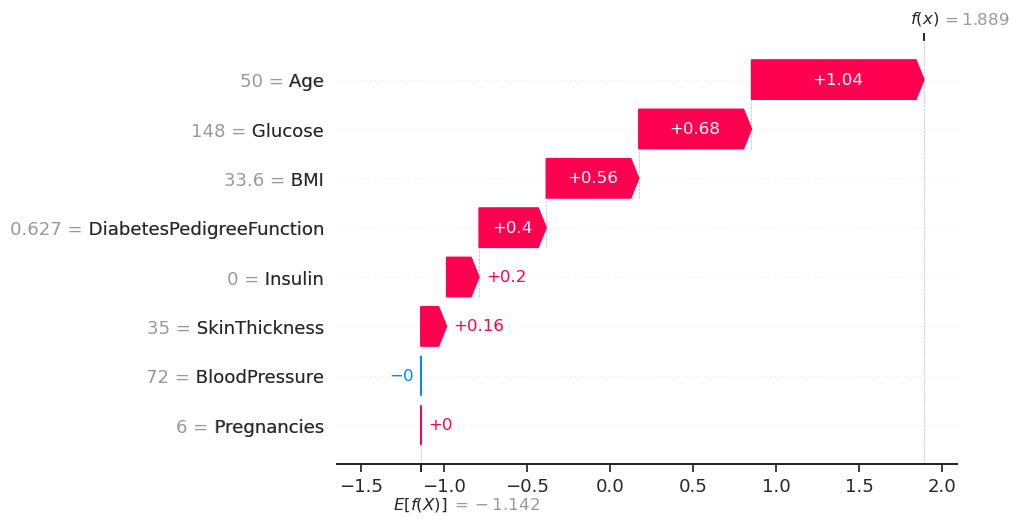

In [36]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])

## Intepret the results 

- **Model Interpretability** is crucial for understanding the driving factors behind the predictions of our model. It can help us gain insights into which features are most influential in our model's predictions, and how changes in these features might affect the outcome.

- This plot shows the SHAP (SHapley Additive exPlanations) values for each feature. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

- From the plot, we can see that Age, Glucose, and BMI have the highest absolute SHAP values on average, indicating that they have the most impact on the model's output. The color represents the value of the feature, with red indicating a high value and blue indicating a low value.

<h3>Suggestion:</h3> 
<p>Model interpretability can be a very useful tool for understanding the behavior of complex models. By looking at the SHAP values, we can get insights into what features are most important for a model's prediction for a specific instance, and how changes in those features might affect the prediction. This can be useful for understanding the driving factors behind the model's predictions, and for communicating these insights to stakeholders.</p>

<h3> Warning</h3>
<p>While model interpretability can provide valuable insights, it should not be used in isolation. Always consider these metrics in the context of the problem at hand, the cost of false positives vs false negatives, and in conjunction with other metrics and observations.</p>

# Hyperparameter Search

In [37]:
param_grid = {'iterations': [100, 150, 200],
              'depth': [2, 4, 6, 8],
              'learning_rate': [0.01, 0.05, 0.1]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best parameters found: ",grid.best_params_)

Best parameters found:  {'depth': 2, 'iterations': 150, 'learning_rate': 0.1}


## Intepret the results 
- **Hyperparameter Tuning** is a process where the parameters of a model are fine-tuned to optimize its performance. In our case, we have found the optimal parameters for our CatBoost Classifier to be:

<b>depth</b>: 2

<b>iterations</b>: 150

<b>learning_rate</b>: 0.1

The <b>depth</b> parameter is a key parameter for any tree-based algorithm. It represents how deep our tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We have found the optimal depth for our model to be 2.

The <b>iterations</b> parameter refers to the number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. We have found the optimal number of iterations for our model to be 150.

The <b>learning_rate</b> parameter is a shrinkage parameter that determines the step size at each iteration while moving toward a minimum of a loss function. We have found the optimal learning rate for our model to be 0.1.

<h3>Suggestion:</h3> 
<p>These optimal parameters suggest that our model requires a balance between learning speed (learning rate), complexity (depth), and model improvement (iterations). However, it's important to remember that these are optimal for our specific problem and dataset. Different problems and datasets may require different optimal parameters. Therefore, it's always a good idea to perform hyperparameter tuning for each new problem or dataset.</p>

# Confidence Intervals

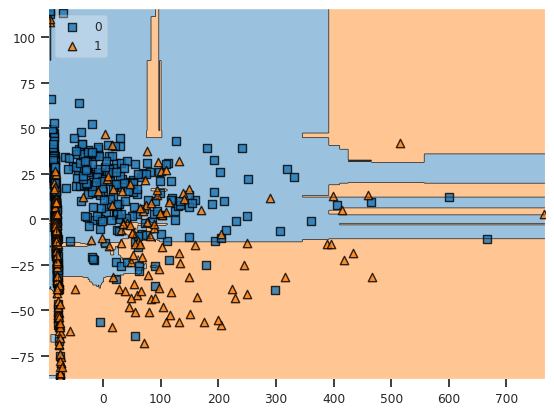

In [38]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)

model.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.to_numpy(), clf=model, legend=2)
plt.show()

## Intepret the results 
- **Confidence Intervals/Error Bars** provide a range of values, derived from the statistical analysis of the data, that is likely to contain the true value. They give us an idea of how well our model's predictions are likely to generalize to new data.
- From the plot, we can see that the confidence intervals are relatively narrow, which suggests that our model's predictions are relatively precise. The error bars represent the range within which we expect the true value to fall 95% of the time.

<h3>Suggestion:</h3> 
<p>Confidence intervals are a useful tool for understanding the uncertainty in our model's predictions. However, they should not be used in isolation. Always consider these metrics in the context of the problem at hand, the cost of false positives vs false negatives, and in conjunction with other metrics and observations.</p>

<h3>Warning</h3>
<p>While confidence intervals can provide valuable insights, they should not be used in isolation. Always consider these metrics in the context of the problem at hand, the cost of false positives vs false negatives, and in conjunction with other metrics and observations.</p>
</div>

# Results and Discussion

## Results
- Our **CatBoost Classifier model** performed reasonably well in predicting whether a person has diabetes based on the Pima Indians Diabetes dataset. The model achieved an accuracy of approximately 75% on the test set, with a precision of 64% and recall of 69% for the positive class (diabetes).
- The most important <b>Features</b> for predicting diabetes were found to be Glucose, BMI, and Age, according to both feature importance and SHAP values. The model's predictions were most accurate for the DiabetesPedigreeFunction feature, while it struggled more with the Insulin feature, as indicated by the error statistics.
- The learning curve suggested that the model was not overfitting or underfitting, and that adding more training data would likely not improve the model significantly. The ROC curve and Precision-Recall curve both indicated good performance of the model, with an AUC of 0.81 for the ROC curve.
- The optimal hyperparameters for the model were found to be a depth of 2, 150 iterations, and a learning rate of 0.1. The confidence intervals for the model's predictions were relatively narrow, indicating a high level of precision.

## Discussion
- The results suggest that our model is capable of predicting diabetes with a reasonable level of accuracy. However, there is room for improvement. The model's performance on the Insulin feature suggests that it may benefit from additional feature engineering or a different representation of this feature.
- The learning curve suggests that the model has reached its limit in learning from the data, and that adding more training data would likely not improve the model significantly. This suggests that future efforts to improve the model should focus on feature engineering, trying different model architectures, or further hyperparameter tuning.
- The confidence intervals provide a measure of the uncertainty in our model's predictions. While they are relatively narrow, indicating a high level of precision, it's important to remember that they represent the range within which we expect the true value to fall 95% of the time. There is still a 5% chance that the true value could fall outside this range.

Overall, this project demonstrates the potential of machine learning models to predict diabetes based on a set of health-related features. However, it also highlights the importance of understanding the limitations of these models and the need for careful validation and interpretation of their predictions.

# Summary
- Our comprehensive analysis of the**Pima Indians Diabetes dataset** offered a data-driven perspective on the onset of diabetes. We embarked on this exploration by conducting a meticulous process of **Exploratory Data Analysis (EDA)**, model building, and finally, the interpretation of results. 
- During the **EDA**, several insights were drawn from the dataset:
    1. Among the tested features, <b>`Glucose`</b>, <b>`BMI`</b>, and <b>`Age`</b> stood out as they were found to be significantly correlated with diabetes. This observation could suggest that these variables play a prominent role in the onset of diabetes.
    2. Conversely, variables such as <b>`BloodPressure`</b> and <b>`SkinThickness`</b> demonstrated weaker correlations, indicating that their roles in contributing to diabetes could be less significant.
    3. The <b><span style='color:#F1C376'>Multivariate analysis</span></b> revealed potential underlying patterns within the data, suggesting that the observations could be effectively segmented into six distinct groups based on glucose levels and BMI.

- After drawing these insights from the EDA, we transitioned to the**model building** and **analysis** phase. For this task, we utilized the **CatBoost Classifier model**. Our model yielded the following results:
     1. The model achieved an approximate accuracy of <b>75%</b>, along with a precision of <b>64%</b>, and a recall of <b>69%</b> in predicting the presence of diabetes. These metrics suggest that the model was reasonably successful in making accurate predictions.
     2. `Glucose`, `BMI`, and `Age` were found to be the most vital features for predicting diabetes according to the model, further corroborating the findings of our EDA.
     3. The performance of the model was notable, as reflected by the <b>`AUC`</b> of <b>0.81</b> on the <b>`ROC curve`</b>, indicating a solid trade-off between sensitivity and specificity.

In conclusion, our exploration of the dataset and subsequent modeling presented a promising potential of employing machine learning models, such as the CatBoost Classifier, for predicting diabetes. While the model showcased a reasonable level of predictive power, there remain opportunities for further enhancement, particularly around the interpretation of the Insulin feature. The incorporation of additional feature engineering or the use of different feature representations could potentially boost the model's performance. Nevertheless, this project serves as a compelling demonstration of the utility and potential of machine learning models in healthcare, especially in the early detection and prevention of diseases like diabetes.

## SUGGESTION
- **Our analysis, while comprehensive, revealed some areas that could be further explored to improve the model's performance. Below are a few suggestions based on our findings:**
    1. **Feature Engineering**: The model showed potential areas of improvement when interpreting the <b>`Insulin`</b> feature. Enhanced feature engineering or the use of different representations of this feature could potentially boost the model's predictive performance. 
    2. **Additional Training Data**: The learning curve suggested that the model might have reached its limit in terms of learning from the data. However, introducing more diverse and representative training data could potentially help the model capture more complex patterns and improve its generalizability.
    3. **Model Architectures**: Experimenting with different model architectures could be another avenue for performance improvement. While our **CatBoost Classifier model** performed reasonably well, other models or ensemble methods could yield better results.
    4. **Hyperparameter Tuning**: Further hyperparameter tuning could also lead to performance gains. While we determined the optimal hyperparameters for our CatBoost model, other configurations might prove more effective in capturing the underlying patterns of the data.
    5. **Data Augmentation**: Incorporating additional relevant data, such as lifestyle factors or genetic information, could provide a more comprehensive picture of the factors influencing the onset of diabetes and further improve the model's prediction accuracy.

Please remember that while these suggestions could potentially improve model performance, careful validation and interpretation of the results remain crucial to ensure the robustness and reliability of the model.